# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
# Import potentially useful libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read dataset.
df = pd.read_csv('top10s.csv', encoding = "ISO-8859-1")

# Print data set.
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
# Clean up the column names - they're currently abbreviated and not easy to tell what they're showcasing.

df.columns
df = df.rename(columns={"bpm": "Beats Per Minute", "nrgy": "Energy", "dnce": "Danceability", "dB":"loudness", 
                        "live":"Liveness", "val":"Valence", "dur":"Length", "acous":"Acousticness", 
                        "spch":"Speechiness", "pop":"Popularity"})

df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year',
       'Beats Per Minute', 'Energy', 'Danceability', 'loudness', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [15]:
# Clean up the column names - capitalize.

df.columns = df.columns.str.capitalize()
df.columns

Index(['Unnamed: 0', 'Title', 'Artist', 'Top genre', 'Year',
       'Beats per minute', 'Energy', 'Danceability', 'Loudness', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [22]:
# Drop the index column.

#df = df.drop(['Unnamed: 0'], axis = 1)
df.columns

df

,Title,Artist,Top genre,Year,Beats per minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [23]:
# Calcuate the percentage of missing data from each column.

# The results show no missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Title - 0%
Artist - 0%
Top genre - 0%
Year - 0%
Beats per minute - 0%
Energy - 0%
Danceability - 0%
Loudness - 0%
Liveness - 0%
Valence - 0%
Length - 0%
Acousticness - 0%
Speechiness - 0%
Popularity - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<AxesSubplot:>

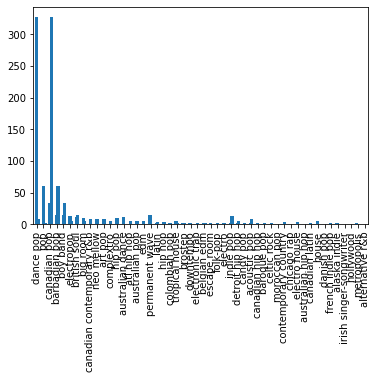

In [26]:
# Created a histogram of top genre.
df['Top genre'].hist(bins=100)

# The histogram shows there are a ton of dance pop.

df['Top genre'].describe()

df['Top genre'].value_counts().plot.bar()

<AxesSubplot:>

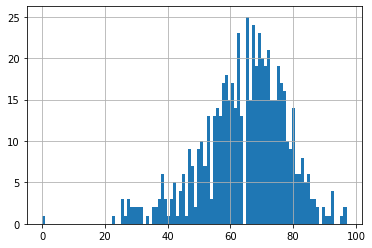

In [27]:
# Created a histogram of Danceability.
df['Danceability'].hist(bins=100)

# Not seeing outliers here.

In [34]:
# Using a different technique to compare the max value with the 75th percentile to see which columns
# may have outliers and it seems they're all pretty normal.

df.describe()

,Year,Beats per minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [45]:
# Look for duplicate values in Title
df['Title'].value_counts()

# It appears about five songs are listed twice in the entire list. I don't believe this is a duplicate,
# but just that those songs were tops songs for more than one year.

A Little Party Never Killed Nobody (All We Got)    2
All I Ask                                          2
Kissing Strangers                                  2
Written in the Stars (feat. Eric Turner)           2
The Hills                                          2
                                                  ..
Finally Found You                                  1
Anything Could Happen                              1
Applause                                           1
Take Back the Night                                1
Kills You Slowly                                   1
Name: Title, Length: 584, dtype: int64

In [ ]:
# How do I look for duplicate rows?

In [56]:
# Drop rows with more than one NaN column

missing_df = df.dropna()
missing_df.shape

# The new df shape is 603, 14, but the original df shape is also 603, 14 so there are no NA rows in our df

(603, 14)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [54]:
# SHOULD I CHANGE DURATION FROM SECONDS TO MIN + SEC?

,Title,Artist,Top genre,Year,Beats per minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [61]:
# There is no inconsistent data.



## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?